In [53]:
import numpy as np
import matplotlib.pyplot as plt

**Problem 1**

In [54]:
altitude = 400 #km
h = altitude * 1000 #m
r_earth = 6378 #km
r = r_earth + altitude #km
m = 12 #kg
x = 0.2 #m
y = 0.3 #m
z = 0.1 #m
I_x = m * (y**2 + z**2)/12
I_y = m * (x**2 + z**2)/12
I_z = m * (x**2 + y**2)/12
CD = 2
r_cp = 0.001 #m

In [55]:
Temperature = -131.21 + 0.00299 * h #C
P = 2.488 * ((Temperature + 273.1)/216.6)**(-11.388) #kPa
density = P / (0.2869 * (Temperature + 273.1)) #kg / m^3

In [56]:
#calculate orbital parameters
mu = 398600 #km^3/s^2
v = np.sqrt(mu/r) * 1000 #from vis viva, m/s
period = 2 * np.pi * np.sqrt(r**3 / mu) #s
period

5553.458974626875

In [57]:
#calculate max torque: drag is hitting the largest face of the satellite head-on
A = x * y
F = 0.5 * density * CD * A * v**2
T = F * r_cp
print("max torque due to air drag: " + str(T) + " Nm")

max torque due to air drag: 2.2599001600747827e-08 Nm


In [68]:
#calculate change new angle, new force, new area, etc. every second
dt = 1 #s
steps = int(np.floor(period/dt))
A = x * y
F = 0.5 * density * CD * A * v**2
T = F * r_cp
theta = 0. #angle of satellite, 0 is vertical wrt to Earth
omega = 0. #angular velocity
alpha = 0. #angular acceleration
total_rot = 0. #total rotation
alphas = np.zeros(steps)
omegas = np.zeros(steps)
for i in range(steps):
    d_theta = omega #update theta
    theta += d_theta
    alphas[i] = alpha
    omegas[i] = omega
    total_rot += abs(d_theta) #update total rotation
    A = abs(x*y*np.cos(theta)) #calculate cross-sectional area in flow
    F = 0.5 * density * CD * A * v**2 #calculate drag force
    T = F * r_cp * np.cos(theta) #calculate torque
    alpha = T / I_x #update angular acceleration
    omega += alpha*dt #update angular velocity

In [69]:
print("total rotation from drag: " + str(total_rot) + " rad")

total rotation from drag: 2.439163414782944 rad


**Problem 2**

In [60]:
#solar radiation parameters
Fs = 1350 #W/m^2
c = 3 * 10**8 #m/s
q = 0.93 #worst case scenario reflectance
r_cp = 0.001 #m, same as radius of center of pressure

In [61]:
#calculate maximum solar radiation torque: the sun hits the satellite head on
A = x * y #m^2
i = 0 #angle of incidence to the sun
T = (Fs/c) * A * (1+q) * np.cos(i) * r_cp
print("maximum torque from solar radiation: " + str(T) + " Nm")

maximum torque from solar radiation: 5.211000000000001e-10 Nm


In [62]:
#calculate change new angle, new force, new area, etc. every second
dt = 1 #s
steps = int(np.floor(period/dt))
A = x * y
T = (Fs/c) * A * (1+q) * np.cos(i) * r_cp
i = 0. #angle of incidence to the sun, 0 is vertical wrt to Earth
omega = 0. #angular velocity
alpha = 0. #angular acceleration
total_rot = 0. #total rotation
alphas = np.zeros(steps)
omegas = np.zeros(steps)
for j in range(steps):
    d_i = omega #update theta
    i += d_i
    alphas[j] = alpha
    omegas[j] = omega
    total_rot += abs(d_i) #update total rotation
    A = abs(x*y*np.cos(i)) #calculate cross-sectional area in flow
    T = (Fs/c) * A * (1+q) * np.cos(i) * r_cp #calculate torque
    alpha = T / I_x #update angular acceleration
    omega += alpha*dt #update angular velocity

In [63]:
print("total rotation from solar radiation: " + str(total_rot) + " rad")

total rotation from solar radiation: 0.08029371146185132 rad


**Problem 3**

In [64]:
theta = np.radians(1) #angle of deviation of z axis from lcoal vertical
T_g = (3 * mu / (2 * r**3)) * (I_z - I_y) * np.cos(2*(theta + np.pi/4))
print("gravity gradient torque at 1 degree of deviation: " + str(T_g) + " Nm")

gravity gradient torque at 1 degree of deviation: -5.360842041272934e-09 Nm


In [70]:
#calculate change new angle, new force, new area, etc. every second
#start from 1 deg perturbation
#the satellite does not automatically rotate to stay perfectly veritcal, so it essentially always has an angular velocity
dt = 1 #s
steps = int(np.floor(period/dt))
alphas = np.zeros(steps)
omegas = np.zeros(steps)
thetas = np.zeros(steps)
times = np.linspace(0, steps, steps)
T_g = (3 * mu / (2 * r**3)) * np.abs(I_z - I_y) * np.cos(2*(theta  + np.pi/4))
theta = np.radians(1) #angle of incidence to the sun, 0 is vertical wrt to Earth
omega = 0. #angular velocity
alpha = T_g / I_x #angular acceleration
total_rot = 0. #total rotation
for j in range(steps):
    d_theta = omega #change in rotation from gravity torque
    theta += d_theta
    alphas[j] = alpha
    omegas[j] = omega
    thetas[j] = theta
    total_rot += abs(d_theta) #update total rotation
    T_g = (3 * mu / (2 * r**3)) * np.abs(I_z - I_y) * np.cos(2*(theta + np.pi/4)) #calculate torque
    alpha = T_g / I_x #update angular acceleration
    omega += alpha*dt #update angular velocity

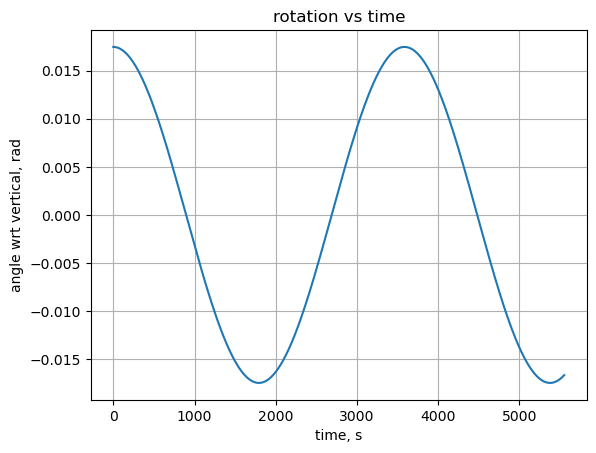

In [72]:
plt.plot(times, (thetas))
plt.ylabel('angle wrt vertical, rad')
plt.xlabel('time, s')
plt.grid()
plt.title('rotation vs time')
plt.savefig('initial_1.5.png', facecolor='white', transparent=False)

**Problem 4**

In [67]:
#this one is simple, calculate parameters and use them to calculate torque
M_earth = 7.96e15 #Tesla
B = 2 * M_earth / (r * 1000)**3 #magnetic field strength
D = 0.03 #Am^2
T_mag = D * B
print("maximum magnetic torque: " + str(T_mag) + " Nm")

maximum magnetic torque: 1.5337678306848668e-06 Nm
